## 8.0 Dep Trees EDA 
1. Before dealing with 3 special cases listed @
[Meeting Minutes](https://docs.google.com/document/d/17dW7Ez8wbULITSe6E5FWNudWOelQmqiWVbFqYe4M15Y/edit#heading=h.xjm3avffkonu), check the trees by printing them out. 
2. Data used is @ [ckip_absa/0705-dep-testdata](https://docs.google.com/spreadsheets/d/1C12yZS3VPME9N3G_RQjZ3y3rNpKF9AGIOFCNiKm-TzE/edit#gid=0)
3. Detection -> Processing 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# at your repo/codes level

In [3]:
import pandas as pd
import numpy as np 
import sys, os
import random
from random import randint 
deptree_module = '../src/'
if deptree_module not in sys.path:
    sys.path.append(deptree_module)
from DepTree import DepTree

In [4]:
filepath = f'../data/0705-special-cases/0705-dep-testdata_parsed.pkl'
filepath2 = f'../data/0628-beef-noodles/review_clean_parsed.pkl'
df = pd.read_pickle(filepath)
                 # converters=
                 # {'word_seg': pd.eval, 'pos': pd.eval, 'dependency_parse':pd.eval})
df2 = pd.read_pickle(filepath2)
                 # converters=
                 # {'word_seg': pd.eval, 'pos': pd.eval, 'dependency_parse':pd.eval})
df2.head(2)

,Unnamed: 0,sentence,index,length,time,rating,word_seg,pos,dependency_parse
0,0,酸辣湯是酸甜口感,1,8,1年前,3,"[酸辣湯, 是, 酸甜, 口感]","[(0, root root), (1, 酸辣湯 Na), (2, 是 SHI), (3, ...","[(2 - 是 SHI, 1 - 酸辣湯 Na, amod), (0 - root root..."
1,1,牛肉湯麵的湯有點太鹹了,1,11,1年前,3,"[牛肉湯麵, 的, 湯, 有點, 太, 鹹, 了]","[(0, root root), (1, 牛肉湯麵 Na), (2, 的 DE), (3, ...","[(6 - 鹹 VH, 1 - 牛肉湯麵 Na, nn), (4 - 有點 Dfa, 2 -..."


INFO:root:== DepTree ==
INFO:root:attrs:    	 .pos, .ws, .depparse, .dG, .undG
INFO:root:functions:	 detect(), get_all_sp(), to_image()
INFO:root:finished loading aspect lexicon.
INFO:root:finished loading opinion lexicon.


Current random index: 0
不喜歡這家的榨菜肉絲麵


INFO:root:aspects:	{'idx': [6], 'token': ['榨菜肉絲麵']}
INFO:root:opinions:	{'idx': [2], 'token': ['喜歡'], 'polarity': ['positive']}


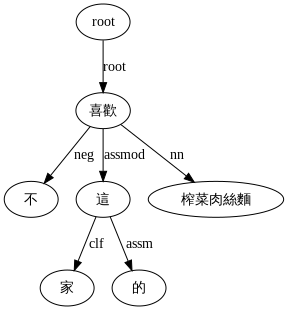

喜歡_2
{'diPath': [(2, 6, 'nn')], 'treePath': ['6 - 榨菜肉絲麵 Na --> 2 - 喜歡 VK']}


In [5]:
rint = randint(0, len(df)-1) # 5麻辣水煮魚
row = df.iloc[rint]
print(f'Current random index: {rint}')
print(row['sentence'])
tree = DepTree(row)
spD = tree.get_all_sp()
tree.to_image()
for k, v in spD.items():
    print(k)
    print(*v, sep = ' ')

In [6]:
# d = pd.read_csv('../repo/src/lexicon/aspect_lexicon.csv')
# new_row = {'Word': '大滷麵', 'type':'麵', 'source':'self-defined'}
# d = d.append(new_row, ignore_index=True)
# d.tail()
# d.to_csv('../repo/src/lexicon/aspect_lexicon.csv', index = False)

In [7]:
# d = pd.read_csv('../repo/data/review_clean.csv')